In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col= 0, parse_dates= True)

In [7]:
df.dropna(inplace= True)

In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Setting the frequency

In [10]:
df.index.freq = "MS"

In [11]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


1. SIMPLE EXPONENTIAL SMOOTHING

SES by pandas

In [15]:
span = 12
alpha = 2/(span + 1)

In [18]:
df["EWMA"] = df["Thousands of Passengers"].ewm(span= span, adjust = False).mean()

In [19]:
df["EWMA"].head()

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
Freq: MS, Name: EWMA, dtype: float64

In [3]:
import statsmodels

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [14]:
model = SimpleExpSmoothing(df["Thousands of Passengers"])

In [16]:
fitted_model = model.fit(smoothing_level= alpha, optimized= False)

In [20]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [21]:
df["SES_12"] = fitted_model.fittedvalues.shift(-1)

In [22]:
df["SES_12"]

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Name: SES_12, Length: 144, dtype: float64

2. DOUBLE EXPONENTIAL SMOOTHING

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
model = ExponentialSmoothing(df["Thousands of Passengers"], trend= "additive")

In [25]:
fitted_model = model.fit()

In [27]:
df["DES_12"] = fitted_model.fittedvalues.shift(-1)

In [28]:
df.head()

,Thousands of Passengers,EWMA,SES_12,DES_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.221156
1949-02-01,118,112.923077,112.923077,120.175837
1949-03-01,132,115.857988,115.857988,134.115056
1949-04-01,129,117.879836,117.879836,131.244976
1949-05-01,121,118.359861,118.359861,123.283465


In [29]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES_12', 'DES_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

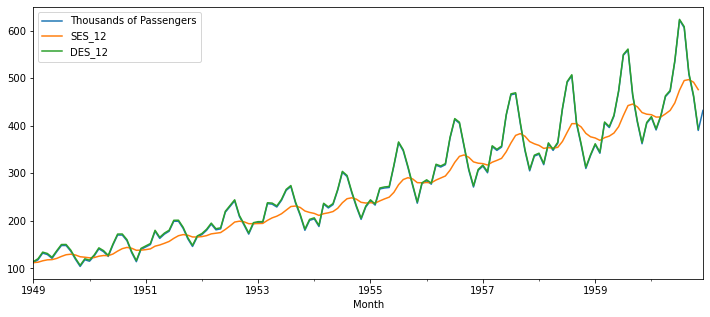

In [34]:
df[['Thousands of Passengers','SES_12', 'DES_12']].plot(figsize = (12, 5))

DES and actual graph is too close, zooming to first 24 months

<AxesSubplot:xlabel='Month'>

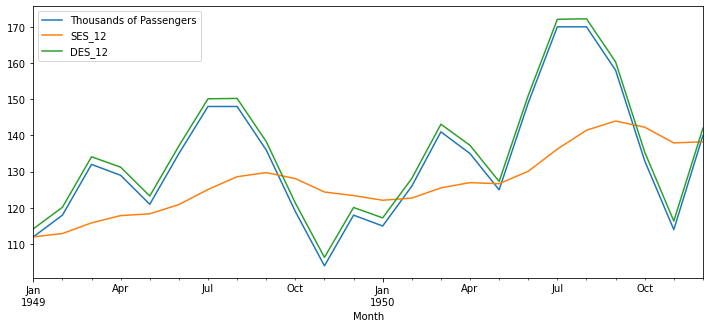

In [35]:
df[['Thousands of Passengers','SES_12', 'DES_12']].iloc[:24].plot(figsize = (12, 5))

Zooming to last 24 months

<AxesSubplot:xlabel='Month'>

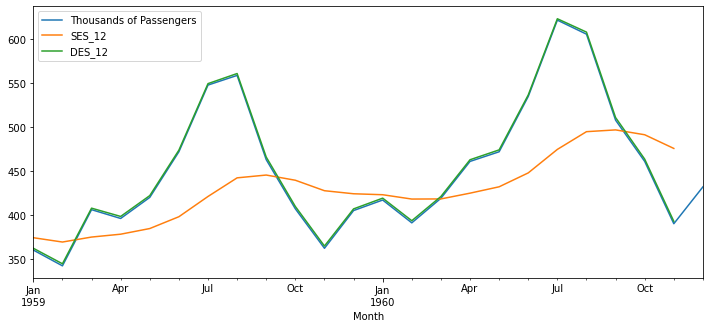

In [36]:
df[['Thousands of Passengers','SES_12', 'DES_12']].iloc[-24:].plot(figsize = (12, 5))

3. TRIPLE EXPONENTIAL SMOOTHING

In [37]:
df["TES_mul_12"] = ExponentialSmoothing(df['Thousands of Passengers'], trend= "mul", seasonal= "mul").fit().fittedvalues

In [38]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES_12', 'DES_12', 'TES_mul_12'], dtype='object')

Comparing DES AND TES FOR FIRST TWO YEARS

<AxesSubplot:xlabel='Month'>

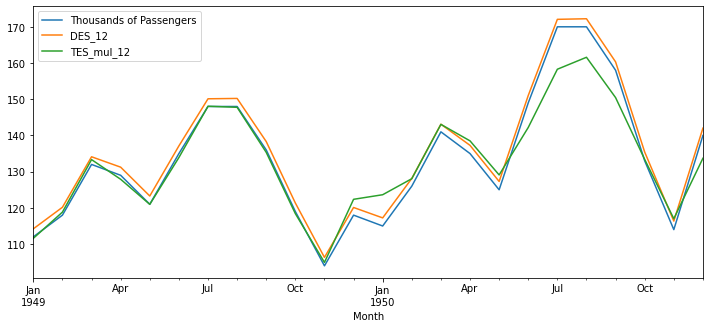

In [42]:
df[['Thousands of Passengers','DES_12', 'TES_mul_12']][:24].plot(figsize = (12, 5))

Comparing DES AND TES for the last 2 years

<AxesSubplot:xlabel='Month'>

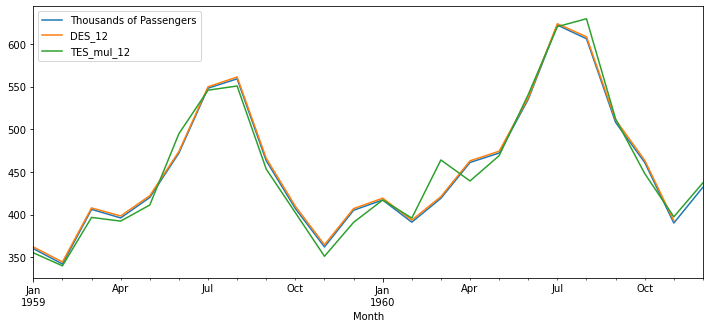

In [43]:
df[['Thousands of Passengers','DES_12', 'TES_mul_12']][-24:].plot(figsize = (12, 5))